# Libraries

In [1]:
pip install pandas numpy scikit-learn nltk matplotlib seaborn wordcloud requests

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 540.5 kB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.5 MB 540.5 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 599.2 kB/s eta 0:00:02
   --------------------------- ------------ 1.0/1.5 MB 699.0 kB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 780.2 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 855.7 kB/s eta 0:00:00
Note: you may need to restart the kernel

In [2]:
pip install jupyter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Load and Explore the Dataset

C:\Users\Vxnu\AppData\Local\Temp\ipykernel_21548\2188698875.py:8: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Vxnu\Desktop\python projects\complaints.csv')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848317 entries, 0 to 7848316
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memo

C:\Users\Vxnu\AppData\Local\Temp\ipykernel_21548\2188698875.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='viridis')


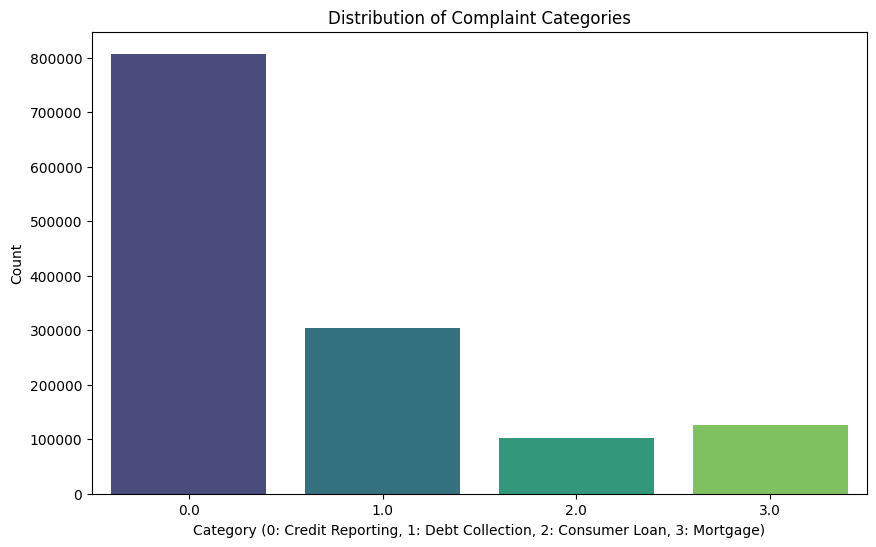

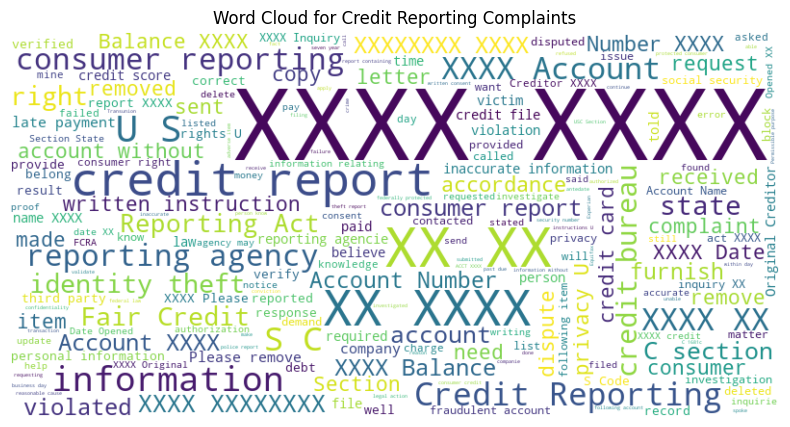


Processed dataset saved as 'processed_complaints.csv'


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


df = pd.read_csv(r'C:\Users\Vxnu\Desktop\python projects\complaints.csv')


print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


print("\nNull Values:")
print(df.isnull().sum())


df = df[['Consumer complaint narrative', 'Product']].dropna()


product_mapping = {
    'Credit reporting, credit repair services, or other personal consumer reports': 0,
    'Debt collection': 1,
    'Payday loan, title loan, or personal loan': 2, 
    'Vehicle loan or lease': 2,  
    'Student loan': 2,  
    'Mortgage': 3,
    'Conventional home mortgage': 3,
    'FHA mortgage': 3,
    'VA mortgage': 3
}


df['Category'] = df['Product'].map(product_mapping)
df = df[df['Category'].isin([0, 1, 2, 3])]


plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Distribution of Complaint Categories')
plt.xlabel('Category (0: Credit Reporting, 1: Debt Collection, 2: Consumer Loan, 3: Mortgage)')
plt.ylabel('Count')
plt.show()


credit_reporting_text = ' '.join(df[df['Category'] == 0]['Consumer complaint narrative'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(credit_reporting_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Credit Reporting Complaints')
plt.show()


df.to_csv('processed_complaints.csv', index=False)
print("\nProcessed dataset saved as 'processed_complaints.csv'")

# Feature Engineering

In [5]:
df = df[:100000]  

# Text Pre-Processing

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
import string


nltk.download('stopwords')


stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text): 
        return ""
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)  
    text = re.sub('https?://\S+|www\.\S+', '', text) 
    text = re.sub('<.*?>+', '', text) 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub('\n', '', text)  
    text = re.sub('\w*\d\w*', '', text)  
    text = [word for word in text.split(' ') if word not in stopword]  
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]  
    text = " ".join(text)
    return text


df['Cleaned_Narrative'] = df['Consumer complaint narrative'].apply(clean_text)


df.to_csv('preprocessed_complaints.csv', index=False)
print("\nPre-processed dataset saved as 'preprocessed_complaints.csv'")


print("\nSample Cleaned Narratives:")
print(df[['Consumer complaint narrative', 'Cleaned_Narrative']].head())

<>:18: SyntaxWarning: invalid escape sequence '\['
<>:19: SyntaxWarning: invalid escape sequence '\S'
<>:23: SyntaxWarning: invalid escape sequence '\w'
<>:18: SyntaxWarning: invalid escape sequence '\['
<>:19: SyntaxWarning: invalid escape sequence '\S'
<>:23: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Vxnu\AppData\Local\Temp\ipykernel_21548\176837819.py:18: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\Vxnu\AppData\Local\Temp\ipykernel_21548\176837819.py:19: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\Vxnu\AppData\Local\Temp\ipykernel_21548\176837819.py:23: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vxnu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.



Pre-processed dataset saved as 'preprocessed_complaints.csv'

Sample Cleaned Narratives:
                          Consumer complaint narrative  \
299  I have dealt with XXXX XXXX all my life and ev...   
321  I am writing to address a concerning matter re...   
377  This is so annoying & frustrating. Ive sent Ex...   
378  Delete those late dates and update the statuse...   
380  This is so annoying & frustrating. Ive sent Eq...   

                                     Cleaned_Narrative  
299  dealt xxxx xxxx life even though put fraud ale...  
321  write address concern matter regard credit rep...  
377  annoy  frustrat ive sent experian multipl lett...  
378  delet late date updat status account mention i...  
380  annoy  frustrat ive sent equifax multipl lette...  


# Selection of Multi-Classification Model

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


X = df['Cleaned_Narrative']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Linear SVC': LinearSVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}


results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred, target_names=['Credit Reporting', 'Debt Collection', 'Consumer Loan', 'Mortgage']))


Naive Bayes Results:
                  precision    recall  f1-score   support

Credit Reporting       0.91      0.94      0.92     13330
 Debt Collection       0.81      0.70      0.75      4186
   Consumer Loan       0.73      0.75      0.74      1339
        Mortgage       0.84      0.93      0.89      1145

        accuracy                           0.87     20000
       macro avg       0.82      0.83      0.82     20000
    weighted avg       0.87      0.87      0.87     20000


Logistic Regression Results:
                  precision    recall  f1-score   support

Credit Reporting       0.92      0.95      0.94     13330
 Debt Collection       0.84      0.78      0.81      4186
   Consumer Loan       0.83      0.74      0.78      1339
        Mortgage       0.91      0.91      0.91      1145

        accuracy                           0.90     20000
       macro avg       0.88      0.85      0.86     20000
    weighted avg       0.90      0.90      0.90     20000


Linear SVC Re

# Comparison of Model Performance

C:\Users\Vxnu\AppData\Local\Temp\ipykernel_21548\122792606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')


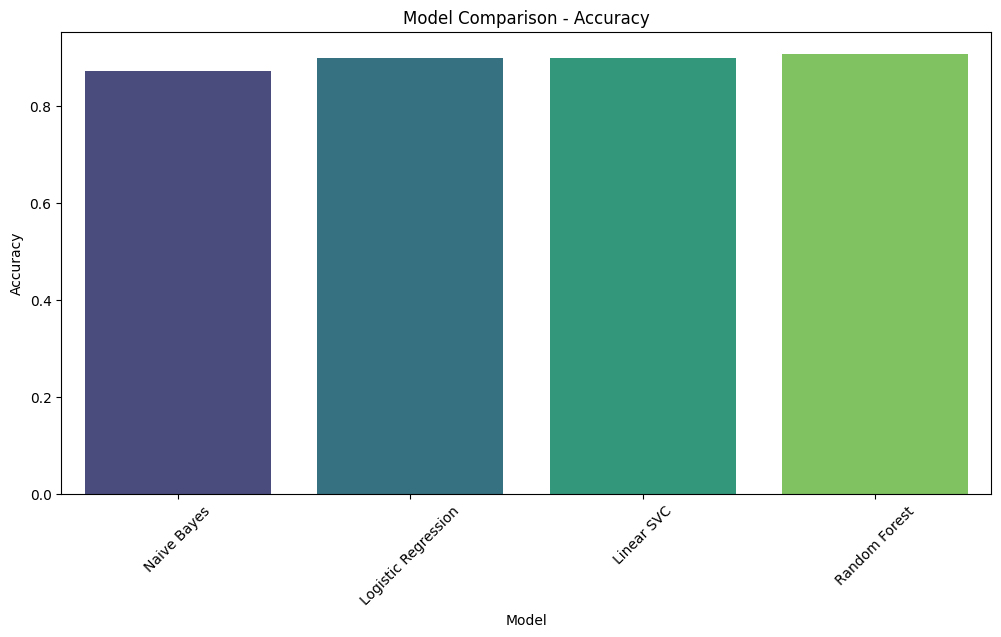


Detailed Model Comparison:
Naive Bayes:
Accuracy: 0.873
Weighted F1-Score: 0.871

Logistic Regression:
Accuracy: 0.900
Weighted F1-Score: 0.899

Linear SVC:
Accuracy: 0.900
Weighted F1-Score: 0.898

Random Forest:
Accuracy: 0.908
Weighted F1-Score: 0.906



In [8]:

plt.figure(figsize=(12, 6))
accuracies = {name: result['accuracy'] for name, result in results.items()}
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


print("\nDetailed Model Comparison:")
for name, result in results.items():
    print(f"{name}:")
    print(f"Accuracy: {result['accuracy']:.3f}")
    print(f"Weighted F1-Score: {result['weighted avg']['f1-score']:.3f}\n")

# Model Evaluation

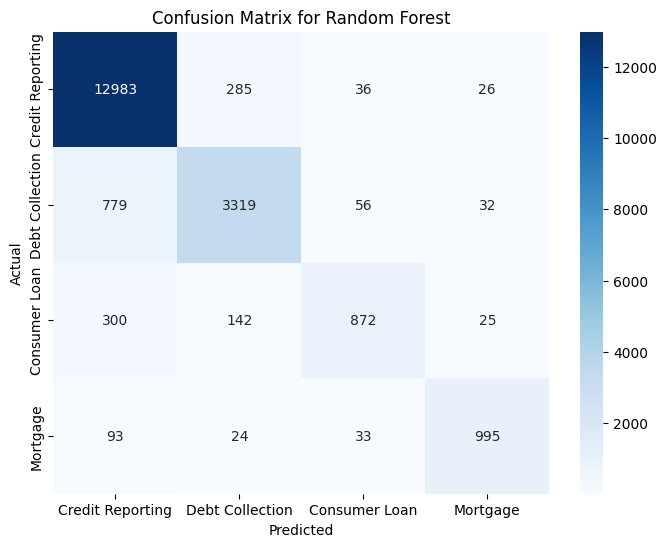


Random Forest Evaluation:
                  precision    recall  f1-score   support

Credit Reporting       0.92      0.97      0.94     13330
 Debt Collection       0.88      0.79      0.83      4186
   Consumer Loan       0.87      0.65      0.75      1339
        Mortgage       0.92      0.87      0.90      1145

        accuracy                           0.91     20000
       macro avg       0.90      0.82      0.86     20000
    weighted avg       0.91      0.91      0.91     20000



In [9]:

best_model = models['Random Forest']
y_pred = best_model.predict(X_test_tfidf)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Credit Reporting', 'Debt Collection', 'Consumer Loan', 'Mortgage'], yticklabels=['Credit Reporting', 'Debt Collection', 'Consumer Loan', 'Mortgage'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print("\nRandom Forest Evaluation:")
print(classification_report(y_test, y_pred, target_names=['Credit Reporting', 'Debt Collection', 'Consumer Loan', 'Mortgage']))

# Prediction

In [13]:
import numpy as np

new_complaints = [
    "My credit report has incorrect information that needs to be fixed.",
    "I am being harassed by a debt collector for a debt I don’t owe.",
    "I’m struggling with my student loan payments and need assistance.",
    "There’s an issue with my mortgage payment process."
]



cleaned_complaints = [clean_text(complaint) for complaint in new_complaints]
new_complaints_tfidf = tfidf.transform(cleaned_complaints)
predictions = best_model.predict(new_complaints_tfidf)


predictions = predictions.astype(int) 

category_names = ['Credit Reporting', 'Debt Collection', 'Consumer Loan', 'Mortgage']

print("\nPredictions for New Complaints:")
for complaint, pred in zip(new_complaints, predictions):
    print(f"Complaint: {complaint}")
    print(f"Predicted Category: {category_names[pred]}\n")


Predictions for New Complaints:
Complaint: My credit report has incorrect information that needs to be fixed.
Predicted Category: Credit Reporting

Complaint: I am being harassed by a debt collector for a debt I don’t owe.
Predicted Category: Debt Collection

Complaint: I’m struggling with my student loan payments and need assistance.
Predicted Category: Consumer Loan

Complaint: There’s an issue with my mortgage payment process.
Predicted Category: Mortgage

